In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame

loan=pd.read_csv("loan.csv")

let us import all this library file and import "loan.csv"

In [98]:
print(loan.shape)

(39717, 111)


Hence,The datset consist of 39717 columns and 111 rows

let us see the atrributes

In [99]:
print(loan.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


Let remove all the columns where all the values are null

In [100]:
loan.dropna(axis=1,how='all',inplace=True)

In [101]:
print("after removing the columns,where all the values in the column are missings",loan.shape)

after removing the columns,where all the values in the column are missings (39717, 57)


Let count the number of missing values in each attribute

In [102]:
NA_col = loan.isnull().sum()
print("numnber of missing values present in each column")
print(NA_col)

numnber of missing values present in each column
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_lin

In [103]:
trash=(80*len(loan))/100

loan.dropna(thresh=trash,axis=1,inplace=True)

In [104]:
print("after removing column which have 80 % null value,we have",loan.shape)

after removing column which have 80 % null value,we have (39717, 53)


In [105]:
loan.drop_duplicates( keep='first', inplace=True)

In [106]:
print(loan.shape)

(39717, 53)


#lets remove irrelevant columnslumns from first 10 columns
#lets see first 10 columns

In [107]:
print(loan.columns[:10])

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade'],
      dtype='object')


#id & member_id are of no use
#funded_amt & funded)_amt_inv leaks information about future
#grade & sub_grade are redundant columns.we will take sub_grade as it consist of more informaton than grade
#lending money calculate interest bassed on subgrade


In [108]:
 loan.drop([ 'id', 'member_id', 'funded_amnt', 'funded_amnt_inv','int_rate' ,'grade'],axis=1,inplace=True)

In [109]:
print(loan.columns[4:14])

Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose'],
      dtype='object')


#emp_title:The job title supplied by the Borrower when applying for the loan. requires other data and a lot of processing to become potentially useful
#issu_d: eaks data from the future.
#url is irrelevant column
#let drop ths columns

In [110]:

loan.drop(['emp_title','issue_d','url',],axis=1,inplace=True)

#let us examine verification_status &  loan staus columm"
#verification status implies whther the income is verified or not.
#it consist of three values:'source_verified','verified,'notverified'


In [111]:
print(loan['verification_status'])
print(loan['loan_status'])

0               Verified
1        Source Verified
2           Not Verified
3        Source Verified
4        Source Verified
5        Source Verified
6           Not Verified
7        Source Verified
8        Source Verified
9               Verified
10          Not Verified
11       Source Verified
12       Source Verified
13       Source Verified
14       Source Verified
15          Not Verified
16          Not Verified
17          Not Verified
18              Verified
19          Not Verified
20              Verified
21              Verified
22       Source Verified
23          Not Verified
24          Not Verified
25              Verified
26          Not Verified
27          Not Verified
28          Not Verified
29       Source Verified
              ...       
39687       Not Verified
39688       Not Verified
39689       Not Verified
39690       Not Verified
39691       Not Verified
39692       Not Verified
39693       Not Verified
39694       Not Verified
39695       Not Verified


From 'verification_status' & loan_status,it has been seen that in many cases,the customers are aloted with loan without verifying source income.



let us remove onging current loan

As 'source-_verified' is paritial verification of income source ,so we can mark this value as 'not-verified'

In [112]:
loan['verification_status']=loan['verification_status'].str.replace("Source Verified","Not Verified",case = False) 
  

We marked "source_verified" as "not_verified".Now we can replace the "non verified vale with 0" and "verification value with 1"

In [113]:
loan['verification_status']=loan['verification_status'].str.replace( "Not Verified", "0",case = False) 
  

In [114]:
loan['verification_status']=loan['verification_status'].str.replace( "Verified", "1",case = False) 

In [115]:
print(loan["verification_status"].value_counts())

0    26908
1    12809
Name: verification_status, dtype: int64


In [116]:
loan['loan_status']=loan['loan_status'].str.replace( "Charged Off","1000",case = False) 

In [117]:
loan['loan_status']=loan['loan_status'].str.replace( "Fully Paid","999",case = False) 

In [118]:
loan['loan_status']=loan['loan_status'].str.replace( "Current","888",case = False) 

In [119]:
print(loan['loan_status'].value_counts())

999     32950
1000     5627
888      1140
Name: loan_status, dtype: int64


Let us find out<how many defaulted cases or charged off case where source income is not verified

In [120]:
non_verified_defaulted=0
for i in range(0,len(loan)):
    if(loan.loan_status[i]=='1000' and loan.verification_status[i]=='0'):
              non_verified_defaulted=non_verified_defaulted+1
  

In [121]:
print(non_verified_defaulted)

3576


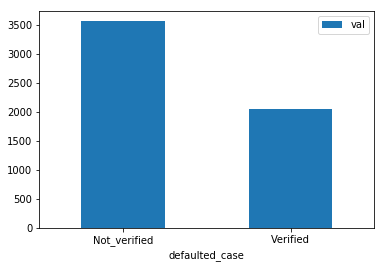

In [122]:
df=pd.DataFrame({'defaulted_case':['Not_verified','Verified'],'val':[3576,2051]})
ax=df.plot.bar(x='defaulted_case',y='val',rot=0)

Let us see the column'emp_length' 
Here we will try to find relationship  betwwen émp_length and loan_amnt

In [123]:
 print(loan['emp_length'].value_counts())

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


Let us replace all the values of < 1 year with value'0'

In [124]:
loan['< 1 year']=loan['emp_length'].replace( "< 1 year","0",inplace=True)

In [125]:
loan.loan_amnt.min()

500

In [126]:
loan.loan_amnt.max()

35000

let us divide the  loan_amnt  into 7 parts :-
    if the loan amount is in bettwen:-
    1.500 to 5500
    2.5501 to 10,500
    3.10,501 to 15,501
    4.15,502 to 20,501
    5.20,502 to 25,502
    6.25,503 to 30,502
    7.30,503 to 35,503
    

let us find out if emp_length <1 years,
1.how much was the loan_amount?
2.if they got issued,how many are defaulted?

In [127]:
count=0
for i in range(0,len(loan)): 
        if(loan.emp_length[i]=="0" and loan.loan_amnt[i]>=500 and loan.loan_amnt[i]<=5500):
                   count=count+1 
             #here,we can find,there are 4583 cases where emp_length is less than 1 year.among 4583,1592 cases have loan amount in betwwen 500 t0 5500 
print(count)
count=0
for i in range(0,len(loan)): 
        if(loan.emp_length[i]=="0" and loan.loan_amnt[i]>=5501 and loan.loan_amnt[i]<=10500):
                   count=count+1 
print("here ",count, "cases are in between rs 5501-10500 and emp_length<1 year")
count=0
for i in range(0,len(loan)): 
        if(loan.emp_length[i]=="0" and loan.loan_amnt[i]>=10501 and loan.loan_amnt[i]<=15501):
                   count=count+1 
print("here ",count, "cases are in between rs 10501-15501 and emp_length<1 year")
count=0
for i in range(0,len(loan)): 
        if(loan.emp_length[i]=="0" and loan.loan_amnt[i]>=15501 and loan.loan_amnt[i]<=20501):
                   count=count+1 
print("here ",count, "cases are in between rs 15501-205001 and emp_length<1 year")
count=0
for i in range(0,len(loan)): 
        if(loan.emp_length[i]=="0" and loan.loan_amnt[i]>=25502 and loan.loan_amnt[i]<=30502):
                   count=count+1 
print("here ",count, "cases are in between rs 25502-30502 and emp_length<1 year")

count=0
for i in range(0,len(loan)): 
        if(loan.emp_length[i]=="0" and loan.loan_amnt[i]>=30502 and loan.loan_amnt[i]<=35502):
                   count=count+1 
print("here ",count, "cases are in between rs 30502-35502 and emp_length<1 year")





1502
here  1519 cases are in between rs 5501-10500 and emp_length<1 year
here  815 cases are in between rs 10501-15501 and emp_length<1 year
here  419 cases are in between rs 15501-205001 and emp_length<1 year
here  49 cases are in between rs 25502-30502 and emp_length<1 year
here  58 cases are in between rs 30502-35502 and emp_length<1 year


In [128]:
count=0
for i in range(0,len(loan)): 
        if(loan.emp_length[i]=="10+ years" and loan.loan_amnt[i]>=500 and loan.loan_amnt[i]<=5500):
                   count=count+1 

let us see ,how many cases are there  whem emp_length is 10+ years

In [129]:
print(count)
count=0
for i in range(0,len(loan)): 
        if(loan.emp_length[i]=="10+ years" and loan.loan_amnt[i]>=5501 and loan.loan_amnt[i]<=10500):
                   count=count+1 
print("here ",count, "cases are in between rs 5501-10500 and emp_length 10+ year")
count=0
for i in range(0,len(loan)): 
        if(loan.emp_length[i]=="10+ years" and loan.loan_amnt[i]>=25502 and loan.loan_amnt[i]<=30502):
                   count=count+1 
print("here ",count, "cases are in between rs 25502-30502 and emp_length 10+ year")
count=0
for i in range(0,len(loan)): 
        if(loan.emp_length[i]=="10+ years" and loan.loan_amnt[i]>=30502 and loan.loan_amnt[i]<=35502):
                   count=count+1 
print("here ",count, "cases are in between rs 30502-35502 and emp_length 10+ year")



1737
here  2483 cases are in between rs 5501-10500 and emp_length 10+ year
here  289 cases are in between rs 25502-30502 and emp_length 10+ year
here  327 cases are in between rs 30502-35502 and emp_length 10+ year


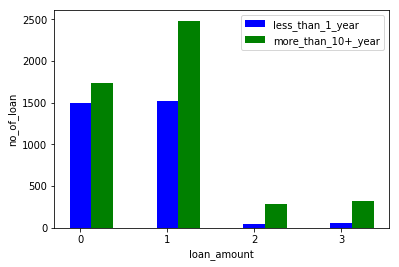

In [130]:
data = [[1502.,1519., 49., 58.],
  [1737., 2483., 289., 327.]
 ]

X = np.arange(4)
plt.xticks(X)
plt.bar(X + 0.00, data[0], color = 'b', width = 0.25, label= "less_than_1_year")
plt.bar(X + 0.25, data[1], color = 'g', width = 0.25, label= "more_than_10+_year")
plt.ylabel('no_of_loan')
plt.xlabel('loan_amount')
plt.legend()
           

From above we can say that as emp_length increases chance of getting loan also increaeses.
The 'loan_amount'also increases as the experiance increase.


Let see res of the columns

In [131]:
print(loan.shape)

(39717, 45)


In [132]:
print(loan.columns)

Index(['loan_amnt', 'term', 'installment', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', '< 1 year'],
      dtype='object')


In [133]:
print(loan['delinq_2yrs'  ].value_counts())

0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64


In [134]:
p=0
count=0
count1=0
count2=0
count3=0
count4=0
count5=0
count6=0
count7=0
for i in range(0,len(loan)):
    if(loan.loan_status[i]=='1000' and loan.delinq_2yrs[i]==1):
        count=count+1
    if(loan.loan_status[i]=='1000' and loan.delinq_2yrs[i]==0):
        p=p+1
            
 
    if( loan.loan_status[i]=='1000' and loan.delinq_2yrs[i]==2):
        count1=count1+1
    if( loan.loan_status[i]=='1000' and loan.delinq_2yrs[i]==3):
        count2=count2+1
    if( loan.loan_status[i]=='1000' and loan.delinq_2yrs[i]==4):
        count3=count3+1
    if( loan.loan_status[i]=='1000' and loan.delinq_2yrs[i]==5): 
        count4=count4+1
    if( loan.loan_status[i]=='1000' and loan.delinq_2yrs[i]==6):
         count5=count5+1
    if( loan.loan_status[i]=='1000' and loan.delinq_2yrs[i]==7):
         count6=count6+1
#35495 is the total number of loans having delinq_2_yrs.we have found it earlier
print((count/3303)*100 ,"is the % of total defaulted when delinq_2yrs is 1" )
print((count1/687)*100,"is the % of total defaulted when delinq_2yrs is 2" )  
print((count2/220)*100 , "is the % of total defaulted when delinq_2yrs is 3" )
print((count3/62)*100,"is the % of total defaulted when delinq_2yrs is 4")
print((count4/22)*100,"is the % of total defaulted when delinq_2yrs is 5")
print((count5/10)*100,"is the %  ofvtotal defaulted when delinq_2yrs is 6")
print((count6/4)*100,"is the % of total defaulted when delinq_2yrs is 7")

15.349682107175294 is the % of total defaulted when delinq_2yrs is 1
18.922852983988356 is the % of total defaulted when delinq_2yrs is 2
15.909090909090908 is the % of total defaulted when delinq_2yrs is 3
20.967741935483872 is the % of total defaulted when delinq_2yrs is 4
13.636363636363635 is the % of total defaulted when delinq_2yrs is 5
10.0 is the %  ofvtotal defaulted when delinq_2yrs is 6
25.0 is the % of total defaulted when delinq_2yrs is 7


15%,18%,15%,20%,13%,10%,25% are the percentage by which the loans are dafaulted if the customer is delinq on 1,2,3,4,5,6,7 acoounts respectively.

Let us plot in the graph

Text(0, 0.5, 'no_of_loan')

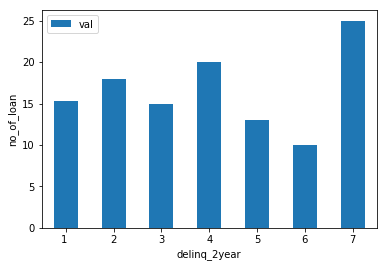

In [135]:
data = [15,19,16,21,13,10,25]
 
df=pd.DataFrame({'delinq_2year':['1 ','2','3','4','5','6','7'],'val':[15.3,18,15,20,13,10,25]})
ax=df.plot.bar(x='delinq_2year',y='val',rot=0)
plt.ylabel('no_of_loan')


FRom the above,we can conclude that as the number of defaulter increases with the incresing deliquent acount but with little percentage.